In [98]:
from importlib.metadata import version
import nltk
import tensorflow
import summa
import pandas as pd
from bs4 import BeautifulSoup
print(nltk.__version__)
print(tensorflow.__version__)
print(pd.__version__)
print(version('summa'))

3.9.1
2.19.0
2.2.3
1.2.0


In [99]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [100]:
data.sample(10)

,headlines,text
26246,"Imran Khan has 5 kids he knows of, some are In...",Former Pakistan cricket team captain and PTI c...
37080,"2 held for cheating 2,000 people of Ã¢ÂÂ¹9 cr...",The Hyderabad Police on Friday arrested two me...
30054,School peon gets life sentence for raping two ...,A POCSO court on Monday sentenced a peon worki...
7226,Facebook to check Indian political ads before ...,Facebook has announced it will confirm the ide...
75814,Muslim man thrown off plane for mentioning 9/1...,A Muslim man has sued Virgin Atlantic airlines...
18860,Just some biryani: Kiara on report of getting ...,"Kiara Advani, while denying the reports that s..."
10917,Air purification devices installed at ITO in D...,With air quality dipping to 'very poor' in Del...
15630,Patriarchy in religion can't outdo right to pr...,Removing the ban on the entry of women aged be...
14470,"Ganguly wishes Zaheer on 40th birthday, asks h...",Wishing former fast bowler Zaheer Khan on the ...
54454,Indian startup launches policing robot in Hyde...,Hyderabad-based technology startup H-Bots Robo...


# 2. 데이터 전처리 (추상적 요약)

In [101]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

# 텍스트 정규화와 불용어 제거

In [102]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions)) # 정규화 단어사전

정규화 사전의 수:  120


In [103]:
# 불용어 제거하기
print('불용어 개수 :', len(stopwords.words('english')))
print('불용어 예시 :', stopwords.words('english'))

불용어 개수 : 198
불용어 예시 : ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 

#### 데이터 전처리 함수인 preprocess_sentence를 만든다

- 모든 문자를 소문자로 변환한다 -> 대소문자 차이로 인한 중복 방지
- HTML 태그 제거 -> 웹스크래핑한 데이터의 불필요한 태그 제거
- 괄호로 감싸인 텍스트를 제거한다. ( 부가 설명, 인용 등을 제거한다)
- 쌍 따옴표 제거
- 약어 정규화
- 소유격 's 제거
- 영어 알파벳 외 문자 제거
- "ummmmmm"처럼 m이 반복되는 표현을 "umm"로 정규화
- 불용어 제거 - remove_stopwords=True: stopword 제거 + 글자수 2자 이상 단어만 유지
    False: stopword는 그대로, 1글자 단어만 제거

In [104]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('=3')

=3


In [105]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


# 전처리된 문장과 제목들을 새로운 리스트로 생성한다.

1. 여기서는 너~무 오래걸려서 민경님의 데이터셋을 다운로드받아와 쓸예정이다.



In [106]:
# clean_text = []  # 전처리된 문장을 저장할 리스트
# clean_headlines = []  # 전처리된 제목을 저장할 리스트

# # 뉴스 본문(text) 데이터에 대해 전처리 수행
# for a in data['text']:
#     # 불용어를 제거하면서 텍스트 전처리 진행
#     clean_text.append(preprocess_sentence(a))

# # 뉴스 제목(headlines) 데이터에 대해 전처리 수행
# for a in data['headlines']:
#     # 제목은 문장이 짧기 때문에 불용어를 제거하지 않고 전처리
#     clean_headlines.append(preprocess_sentence(a, False))

# sample_df = data[['clean_text', 'clean_headlines']]
# from IPython.display import display

# # 표로 출력
# display(sample_df)

# 전처리된 결과 출력 (뉴스 본문 + 요약 포함)
# print("Text 전처리 후 결과: ", clean_text[:5])  # 앞부분 일부 출력
# print("Summary 전처리 후 결과: ", clean_summary[:5])  # ← 오류 있음 (clean_summary 정의되지 않음)


# CSV 파일 불러오기
df = pd.read_csv('clean_data.csv')

# text와 summary 컬럼만 선택
data = df[['clean_text', 'clean_headlines']]

# 데이터 상위 5개 출력 (미리보기)
print(data)







                                              clean_text  \
0      saurav kant alumnus upgrad iiit bs pg program ...   
1      kunal shahs credit card bill payment platform ...   
2      new zealand defeated india wickets fourth odi ...   
3      aegon life iterm insurance plan customers enjo...   
4      speaking sexual harassment allegations rajkuma...   
...                                                  ...   
98355  crpf jawan tuesday axed death sharp edged weap...   
98356  uff yeh first song sonakshi sinha starrer upco...   
98357  according reports new version science fiction ...   
98358  new music video shows rapper snoop dogg aiming...   
98359  madhesi morcha alliance seven political partie...   

                                         clean_headlines  
0      upgrad learner switches to career in ml al wit...  
1      delhi techie wins free food from swiggy for on...  
2      new zealand end rohit sharma led indias match ...  
3      aegon life iterm insurance plan help

In [107]:
# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('=3')

=3


In [108]:
data.isnull().sum()

clean_text         0
clean_headlines    0
dtype: int64

In [109]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


# 훈련데이터와 테스트 데이터 분리하기 

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.25167751118341
제목의 최소 길이 : 1
제목의 최대 길이 : 15
제목의 평균 길이 : 9.265982106547376


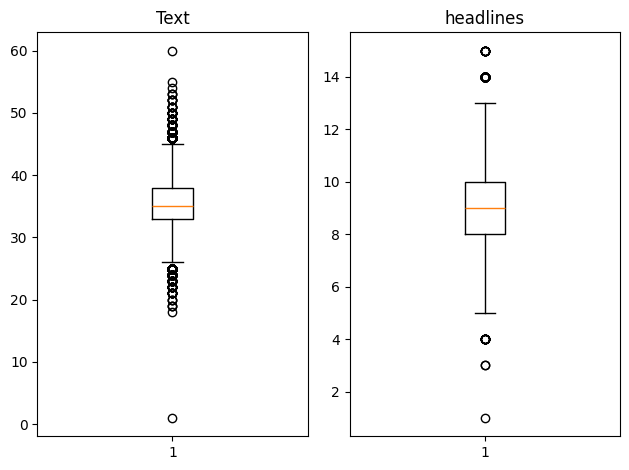

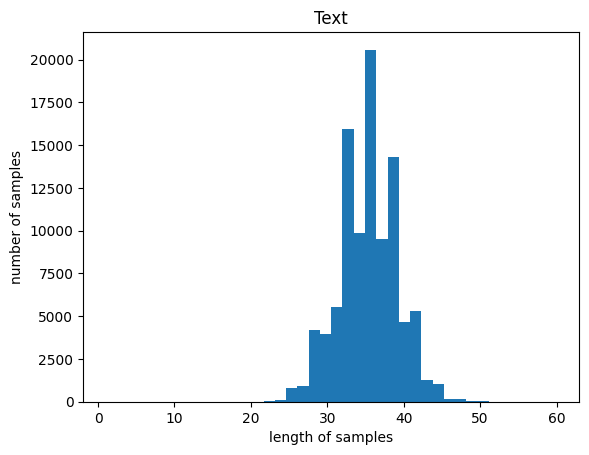

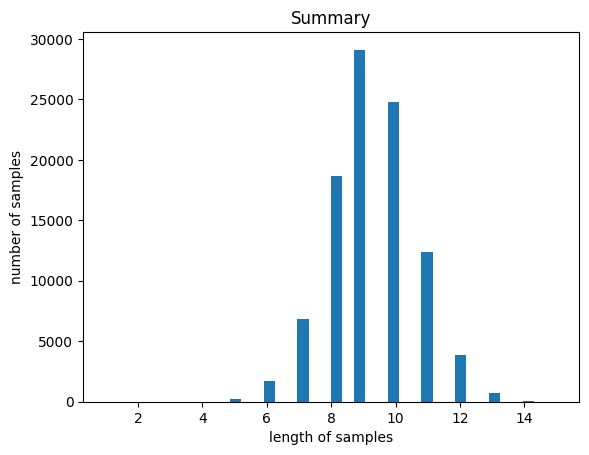

In [110]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['clean_text']]
headlines_len = [len(s.split()) for s in data['clean_headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('제목의 최소 길이 : {}'.format(np.min(headlines_len)))
print('제목의 최대 길이 : {}'.format(np.max(headlines_len)))
print('제목의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#### 굳이 엄청 길지도 않아서 패딩하지 않음

In [111]:
text_max_len = 40 # 문장 최대 길이
headlines_max_len = 10 # 제목의 최대 길이
print('=3')

=3


In [112]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

=3


In [113]:
below_threshold_len(text_max_len, data['clean_text'])
below_threshold_len(headlines_max_len, data['clean_headlines'])
# 길이 조건을 만족하는 행만 남기기
data = data[data['clean_text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['clean_headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]

print('전체 샘플수 :', len(data))

전체 샘플 중 길이가 40 이하인 샘플의 비율: 0.9197539650264335
전체 샘플 중 길이가 10 이하인 샘플의 비율: 0.8267080113867425
전체 샘플수 : 74778


# 훈련데이터와 테스트 데이터 나누기 
- seq2seq 훈련을 위해서는 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가할 필요가 있어요. 
- 이번 실습에서는 시작 토큰은 **sostoken**, 종료 토큰은 **eostoken** 이라 임의로 명명하고 앞, 뒤로 추가할 거예요. 
- 디코더의 입력에 해당하면서 시작 토큰이 맨 앞에 있는 문장의 이름을 **decoder_input**
- 디코더의 출력 또는 레이블에 해당되면서 종료 토큰이 맨 뒤에 붙는 문장의 이름을 **decoder_target** 이라고 이름을 정했어요.
- 두 개의 문장 모두 **Summary** 열로부터 만들 거예요.

In [114]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['clean_headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['clean_headlines'].apply(lambda x : x + ' eostoken')
data.head()

,clean_text,clean_headlines,decoder_input,decoder_target
2,new zealand defeated india wickets fourth odi ...,new zealand end rohit sharma led indias match ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led indias match ...
3,aegon life iterm insurance plan customers enjo...,aegon life iterm insurance plan helps customer...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,pakistani singer rahat fateh ali khan denied r...,rahat fateh ali khan denies getting notice for...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
9,congress candidate shafia zubair ramgarh assem...,cong wins ramgarh bypoll in rajasthan takes to...,sostoken cong wins ramgarh bypoll in rajasthan...,cong wins ramgarh bypoll in rajasthan takes to...
10,two minor cousins uttar pradeshs gorakhpur all...,up cousins fed human excreta for friendship wi...,sostoken up cousins fed human excreta for frie...,up cousins fed human excreta for friendship wi...


In [115]:
encoder_input = np.array(data['clean_text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블
print('=3')

=3


In [116]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[61847  6247 28297 ... 51832 26338  8474]


In [117]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('=3')

=3


In [118]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 14955


In [119]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 59823
훈련 레이블의 개수 : 59823
테스트 데이터의 개수 : 14955
테스트 레이블의 개수 : 14955


# Vocabulary 만들기 및 정수 인코딩

- 이제 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터의 단어들을 모두 정수로 바꾸어 주어야 해요. 이를 위해서는 각 단어에 고유한 정수를 맵핑하는 작업이 필요해요. 이 과정을 **단어 집합(vocabulary)** 을 만든다고 표현해요. 훈련 데이터에 대해서 단어 집합을 만들어볼게요. 우선, 원문에 해당되는 encoder_input_train에 대해서 단어 집합을 만들게요

In [120]:
from tensorflow.keras.preprocessing.text import Tokenizer

src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


In [121]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 64850
등장 빈도가 6번 이하인 희귀 단어의 수: 44994
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 19856
단어 집합에서 희귀 단어의 비율: 69.3816499614495
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.377534048451247


In [122]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성
print('=3')

=3


In [123]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[521, 2211, 2354, 1657, 1316, 2865, 7015, 7533, 2234, 233, 28, 132, 1356, 2720, 7533, 201, 240, 3503, 89, 2341, 4328, 4328, 1598, 593, 9, 4554, 1272], [313, 176, 1436, 45, 69, 43, 1204, 2603, 124, 2, 15, 213, 144, 154, 5178, 7, 1, 1436, 5, 687, 3804, 213, 3221, 132, 218, 650, 213, 7962, 4796, 1176, 984, 549], [3666, 119, 133, 7130, 5881, 1982, 870, 985, 6283, 671, 205, 357, 5881, 3376, 1512, 985, 6904, 17, 397, 1554, 1911, 48, 371, 5881, 973, 450, 16, 1211, 1598, 6905, 99]]


In [124]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)
print('=3')

=3


In [125]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 28848
등장 빈도가 5번 이하인 희귀 단어의 수: 19488
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9360
단어 집합에서 희귀 단어의 비율: 67.55407653910149
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.30379798474279


In [126]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 559, 481, 5, 892], [1, 725, 1016, 1777, 93, 30, 5, 215, 118], [1, 1865, 58, 6, 594, 235, 283], [1, 277, 20, 156, 24, 49], [1, 147, 672, 807, 3, 69, 57, 620, 65]]
target
decoder  [[559, 481, 5, 892, 2], [725, 1016, 1777, 93, 30, 5, 215, 118, 2], [1865, 58, 6, 594, 235, 283, 2], [277, 20, 156, 24, 49, 2], [147, 672, 807, 3, 69, 57, 620, 65, 2]]


In [127]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 11
삭제할 테스트 데이터의 개수 : 2
훈련 데이터의 개수 : 59812
훈련 레이블의 개수 : 59812
테스트 데이터의 개수 : 14953
테스트 레이블의 개수 : 14953


In [128]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen= headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen= headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')
print('=3')

=3


In [129]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더 LSTM 1층
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True,
                     dropout=0.4, recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더 LSTM 2층
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True,
                     dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더 LSTM 3층
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True,
                     dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

In [130]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [131]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 40, 128)   │  1,024,000 │ input_layer_7[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ [(None, 40, 256), │    394,240 │ embedding_2[0][0] │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_8       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ [(None, 40, 256), │    525,312 │ lstm_4[0][0]      │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, None, 128) │    256,000 │ input_layer_8[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ [(None, 40, 256), │    525,312 │ lstm_5[0][0]      │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ [(None, None,     │    394,240 │ embedding_3[0][0… │
│                     │ 256), (None,      │            │ lstm_6[0][1],     │
│                     │ 256), (None,      │            │ lstm_6[0][2]      │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, None,      │    514,000 │ lstm_7[0][0]      │
│                     │ 2000)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,633,104 (13.86 MB)

 Trainable params: 3,633,104 (13.86 MB)

 Non-trainable params: 0 (0.00 B)

In [132]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 40, 128)   │  1,024,000 │ input_layer_7[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ [(None, 40, 256), │    394,240 │ embedding_2[0][0] │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_8       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ [(None, 40, 256), │    525,312 │ lstm_4[0][0]      │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, None, 128) │    256,000 │ input_layer_8[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ [(None, 40, 256), │    525,312 │ lstm_5[0][0]      │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ [(None, None,     │    394,240 │ embedding_3[0][0… │
│                     │ 256), (None,      │            │ lstm_6[0][1],     │
│                     │ 256), (None,      │            │ lstm_6[0][2]      │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, None, 256) │        256 │ lstm_7[0][0],     │
│ (AdditiveAttention) │                   │            │ lstm_6[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, None, 512) │          0 │ lstm_7[0][0],     │
│ (Concatenate)       │                   │            │ attention_layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, None,      │  1,026,000 │ concat_layer[0][… │
│                     │ 2000)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,145,360 (15.81 MB)

 Trainable params: 4,145,360 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

In [133]:
import numpy as np

encoder_input_train = np.array(encoder_input_train)
decoder_input_train = np.array(decoder_input_train)
decoder_target_train = np.array(decoder_target_train)

encoder_input_test = np.array(encoder_input_test)
decoder_input_test = np.array(decoder_input_test)
decoder_target_test = np.array(decoder_target_test)

In [134]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=100)

Epoch 1/100
120/234 ━━━━━━━━━━━━━━━━━━━━ 1:33 818ms/step - loss: 5.2321

KeyboardInterrupt: 

# 2.0까지 떨어짐

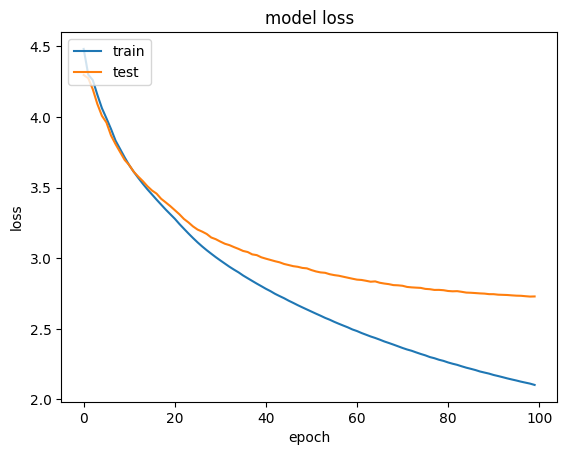

In [ ]:
# 그래프
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# 학습곡선 그리기
def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.title('model ' + string)
    plt.ylabel(string)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_graph(history, 'loss')

In [ ]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

=3


In [ ]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('=3')

=3


In [ ]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')

=3


In [ ]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('=3')

=3


In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp = ''
    for i in input_seq:
        if i != 0 and i != tar_word_to_index['sostoken'] and i != tar_word_to_index['eostoken']:
            temp += tar_index_to_word.get(i, '') + ' '
    return temp

print('=3')

=3


In [80]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : karnataka cm siddaramaiah wednesday claimed members bjp rss bajrang dal terrorists government tolerate organisation tries peace society added slamming siddaramaiah remark bjp accused trying upcoming karnataka assembly elections communal lines 
실제 요약 : bjp rss have terrorists ktaka cm 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
예측 요약 :  bjp karnataka cm warns of karnataka cm


원문 : canadian man rescued october last year almost five years arrested charges including sexual assault incidents alleged taken place following return canada adding evidence allegations provided yet lawyer said client innocent 
실제 요약 : canadian rescued from taliban arrested over sexual assault 
1/1 ━━━━━━━━━━━━━━━

# Summa

In [95]:
data = pd.read_csv("news_summary_more.csv", encoding="iso-8859-1")
print(data.columns)  # ['headlines', 'text']

Index(['headlines', 'text'], dtype='object')


In [96]:
from bs4 import BeautifulSoup
import re

def clean_text_for_extractive(text):
    text = BeautifulSoup(text, "lxml").text              # HTML 태그 제거
    text = re.sub(r'\s+', ' ', text)                     # 여러 공백 → 하나로
    text = text.strip()
    return text

In [97]:
summa_results = []

for i in range(50):
    raw_text = clean_text_for_extractive(data['text'].iloc[i])
    gold_summary = data['headlines'].iloc[i]

    try:
        extracted_summary = summarize(raw_text, ratio=0.2)
        if extracted_summary.strip() == '':
            extracted_summary = '[요약 안됨]'
    except:
        extracted_summary = '[오류 발생]'

    summa_results.append({
        '원문': raw_text,
        '실제 헤드라인 (요약)': gold_summary.strip(),
        'Summa 추출 요약': extracted_summary.strip()
    })

df_summa = pd.DataFrame(summa_results)
from IPython.display import display
display(df_summa)


,원문,실제 헤드라인 (요약),Summa 추출 요약
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...,[요약 안됨]
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...,[요약 안됨]
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...,[요약 안됨]
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...,[요약 안됨]
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim...",[요약 안됨]
5,Pakistani singer Rahat Fateh Ali Khan has deni...,Rahat Fateh Ali Khan denies getting notice for...,[요약 안됨]
6,India recorded their lowest ODI total in New Z...,"India get all out for 92, their lowest ODI tot...",[요약 안됨]
7,Weeks after ex-CBI Director Alok Verma told th...,Govt directs Alok Verma to join work 1 day bef...,[요약 안됨]
8,Andhra Pradesh CM N Chandrababu Naidu has said...,Called PM Modi 'sir' 10 times to satisfy his e...,[요약 안됨]
9,Congress candidate Shafia Zubair won the Ramga...,"Cong wins Ramgarh bypoll in Rajasthan, takes t...",[요약 안됨]


In [135]:
from summa.summarizer import summarize
from bs4 import BeautifulSoup
import pandas as pd
import urllib.request
import re

# 데이터 로딩
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv",
    filename="news_summary_more.csv"
)
data = pd.read_csv("news_summary_more.csv", encoding="iso-8859-1")

# 전처리 함수 (문장 구분 유지, HTML 제거만)
def clean_for_summa(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\s+', ' ', text)  # 줄바꿈 제거, 여러 공백 → 하나로
    return text.strip()

# 요약 비교 결과 저장
summa_results = []

for i in range(50):
    raw_text = clean_for_summa(data['text'].iloc[i])
    gold_summary = data['headlines'].iloc[i]

    try:
        extracted_summary = summarize(raw_text, words=30)  # 단어 수 기준
        if not extracted_summary.strip():
            extracted_summary = '[요약 안됨]'
    except:
        extracted_summary = '[오류 발생]'

    summa_results.append({
        '원문': raw_text,
        '실제 헤드라인 (요약)': gold_summary.strip(),
        'Summa 추출 요약': extracted_summary.strip()
    })

# 결과 출력
df_summa = pd.DataFrame(summa_results)
from IPython.display import display
display(df_summa)


,원문,실제 헤드라인 (요약),Summa 추출 요약
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...,The program and upGrad's 360-degree career sup...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...,Users get one CRED coin per rupee of bill paid...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...,"Also, customers have options to insure against..."
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
5,Pakistani singer Rahat Fateh Ali Khan has deni...,Rahat Fateh Ali Khan denies getting notice for...,Pakistani singer Rahat Fateh Ali Khan has deni...
6,India recorded their lowest ODI total in New Z...,"India get all out for 92, their lowest ODI tot...",India recorded their lowest ODI total in New Z...
7,Weeks after ex-CBI Director Alok Verma told th...,Govt directs Alok Verma to join work 1 day bef...,Weeks after ex-CBI Director Alok Verma told th...
8,Andhra Pradesh CM N Chandrababu Naidu has said...,Called PM Modi 'sir' 10 times to satisfy his e...,Andhra Pradesh CM N Chandrababu Naidu has said...
9,Congress candidate Shafia Zubair won the Ramga...,"Cong wins Ramgarh bypoll in Rajasthan, takes t...",Congress candidate Shafia Zubair won the Ramga...
